In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import ARIMA
from tqdm import trange

In [2]:
plt.style.use("default")

# SnP return

In [5]:
import yfinance as yf
snp = yf.download("^GSPC", start='2022-01-01', end='2023-12-01', interval='1h')
data = snp["Close"]

test_size = 30
train_size = len(data) - test_size
train, test = data[:train_size], data[train_size:]

[*********************100%%**********************]  1 of 1 completed


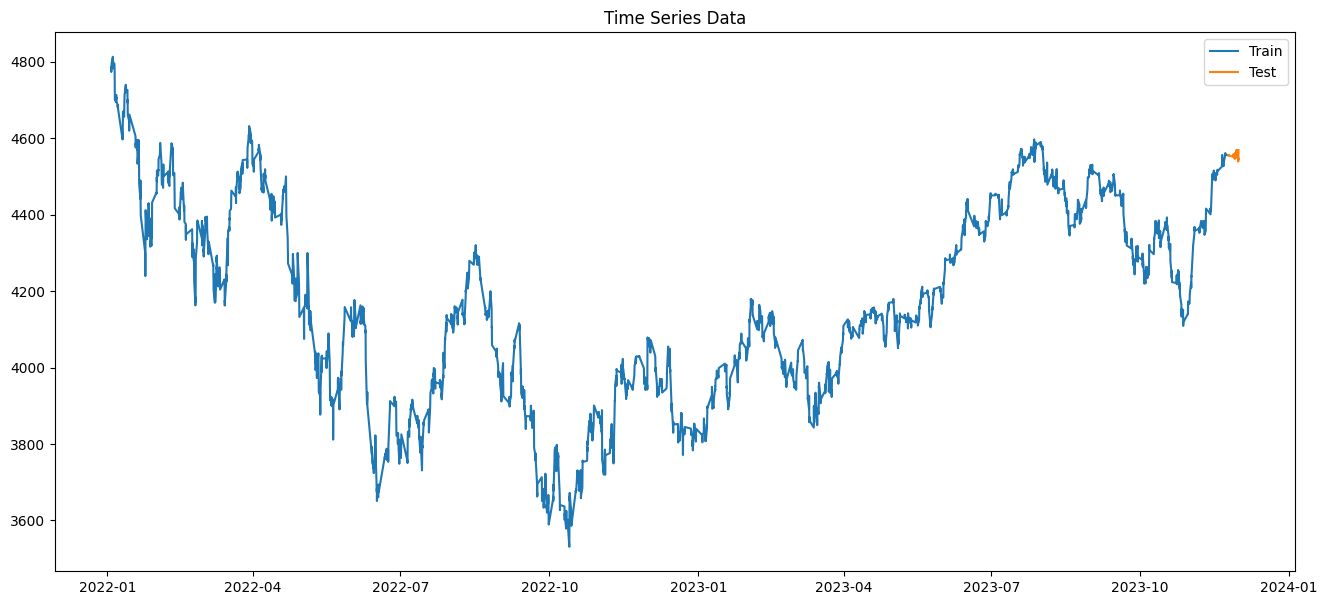

In [7]:
plt.figure(figsize=(16, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [8]:
result = adfuller(train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.52443704969282
p-value: 0.10964117028115378


In [9]:
data_diff = data.diff().dropna()

test_size = 30
train_size = len(data_diff) - test_size
train_diff, test_diff = data_diff[:train_size], data_diff[train_size:]

In [10]:
result = adfuller(train_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -15.718828510862625
p-value: 1.3316169463603885e-28


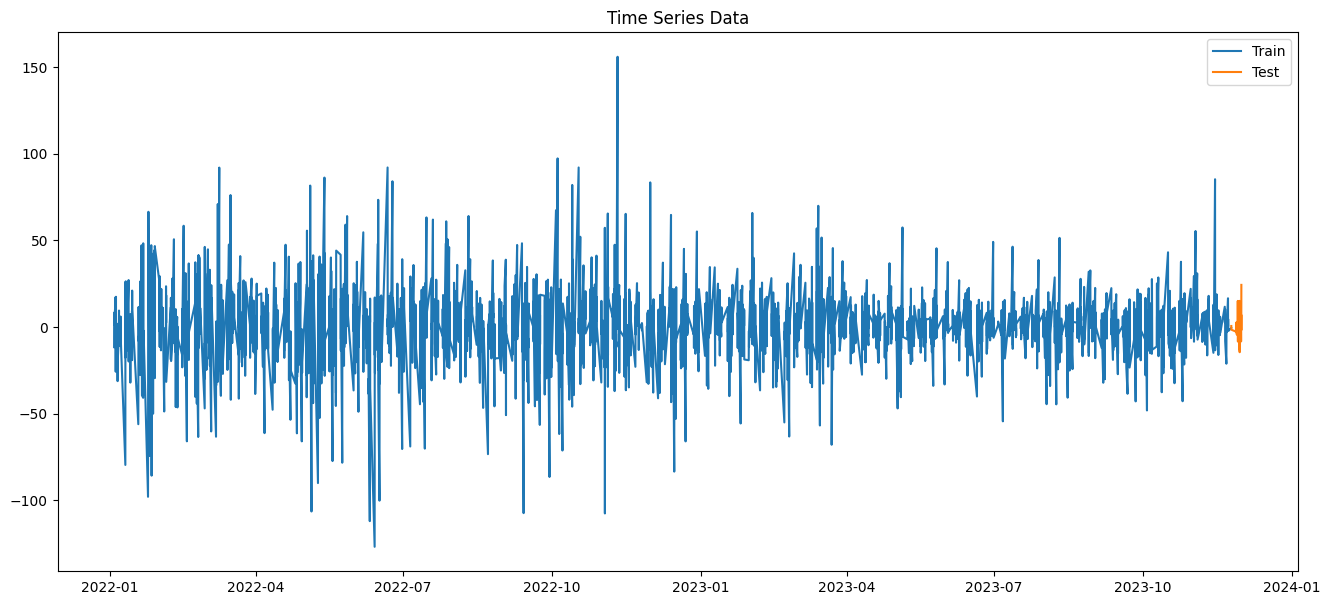

In [11]:
plt.figure(figsize=(16, 7))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
train_diff_scaled = scaler.fit_transform(train_diff.to_numpy().reshape(-1, 1)).flatten()
test_diff_scaled = scaler.transform(test_diff.to_numpy().reshape(-1, 1)).flatten()

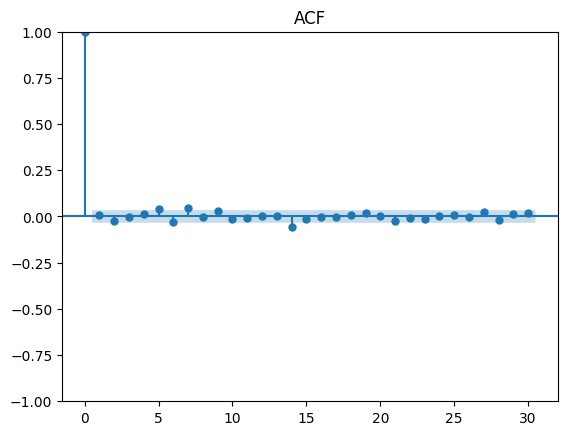

In [13]:
plot_acf(train_diff_scaled, lags=30)
plt.title('ACF')
plt.show()

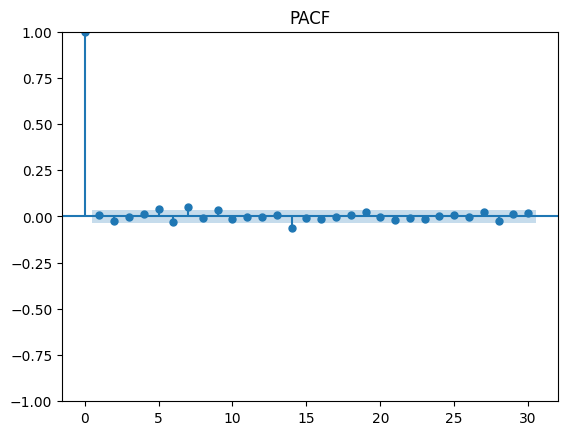

In [14]:
plot_pacf(train_diff_scaled, lags=30)
plt.title('PACF')
plt.show()

In [15]:
p, i, q = 14, 0, 14

In [16]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [19]:
from pmdarima.arima import ARIMA

In [22]:
history = [x for x in train_diff_scaled]
model = ARIMA(order=(p, i, q), maxiter=200)
fitted_model = model.fit(history)
predictions = list()
for t in trange(len(test_diff_scaled)):
    output = fitted_model.predict()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_diff_scaled[t]
    history.append(obs)
    fitted_model.update(obs)
    # Print one-step ahead prediction
    print('Predicted=%f, Expected=%f' % (yhat, obs))

c:\Documents\hse-ds\dynamics\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
  3%|▎         | 1/30 [00:05<02:50,  5.89s/it]

Predicted=-0.065571, Expected=0.030027


  7%|▋         | 2/30 [00:11<02:45,  5.92s/it]

Predicted=-0.016339, Expected=-0.084239


 10%|█         | 3/30 [00:16<02:24,  5.36s/it]

Predicted=0.031704, Expected=-0.146494


 13%|█▎        | 4/30 [00:22<02:27,  5.65s/it]

Predicted=-0.028548, Expected=0.111069


 17%|█▋        | 5/30 [00:27<02:11,  5.27s/it]

Predicted=-0.009720, Expected=0.069225


 20%|██        | 6/30 [00:32<02:05,  5.21s/it]

Predicted=0.016242, Expected=0.139525


 23%|██▎       | 7/30 [00:37<01:59,  5.18s/it]

Predicted=-0.077639, Expected=-0.140599


 27%|██▋       | 8/30 [00:43<01:57,  5.35s/it]

Predicted=-0.066338, Expected=-0.021983


 30%|███       | 9/30 [00:48<01:49,  5.21s/it]

Predicted=-0.046651, Expected=-0.217344


 33%|███▎      | 10/30 [00:54<01:54,  5.72s/it]

Predicted=-0.016550, Expected=-0.256489


 37%|███▋      | 11/30 [00:59<01:40,  5.31s/it]

Predicted=-0.012026, Expected=0.805994


 40%|████      | 12/30 [01:05<01:40,  5.60s/it]

Predicted=0.037083, Expected=-0.075121


 43%|████▎     | 13/30 [01:10<01:30,  5.31s/it]

Predicted=-0.035255, Expected=-0.451850


 47%|████▋     | 14/30 [01:15<01:24,  5.25s/it]

Predicted=-0.020843, Expected=-0.179220


 50%|█████     | 15/30 [01:20<01:18,  5.21s/it]

Predicted=-0.027174, Expected=0.093383


 53%|█████▎    | 16/30 [01:26<01:17,  5.51s/it]

Predicted=-0.020236, Expected=0.247371


 57%|█████▋    | 17/30 [01:31<01:09,  5.38s/it]

Predicted=-0.012916, Expected=0.808666


 60%|██████    | 18/30 [01:37<01:06,  5.58s/it]

Predicted=0.008873, Expected=-0.698671


 63%|██████▎   | 19/30 [01:42<00:58,  5.30s/it]

Predicted=-0.037768, Expected=0.559146


 67%|██████▋   | 20/30 [01:49<00:57,  5.76s/it]

Predicted=0.054860, Expected=0.053661


 70%|███████   | 21/30 [01:54<00:49,  5.52s/it]

Predicted=-0.042892, Expected=-0.212497


 73%|███████▎  | 22/30 [02:01<00:47,  5.95s/it]

Predicted=-0.021265, Expected=-0.781836


 77%|███████▋  | 23/30 [02:08<00:45,  6.43s/it]

Predicted=-0.071184, Expected=0.076195


 80%|████████  | 24/30 [02:14<00:38,  6.36s/it]

Predicted=0.145687, Expected=0.038648


 83%|████████▎ | 25/30 [02:20<00:30,  6.17s/it]

Predicted=-0.109660, Expected=-0.215195


 87%|████████▋ | 26/30 [02:25<00:23,  5.86s/it]

Predicted=0.039740, Expected=-0.447527


 90%|█████████ | 27/30 [02:30<00:16,  5.47s/it]

Predicted=-0.036298, Expected=0.029503


 93%|█████████▎| 28/30 [02:34<00:10,  5.21s/it]

Predicted=0.044543, Expected=0.377254


 97%|█████████▋| 29/30 [02:40<00:05,  5.22s/it]

Predicted=-0.055245, Expected=-0.099279


100%|██████████| 30/30 [02:45<00:00,  5.51s/it]

Predicted=-0.050938, Expected=1.303435


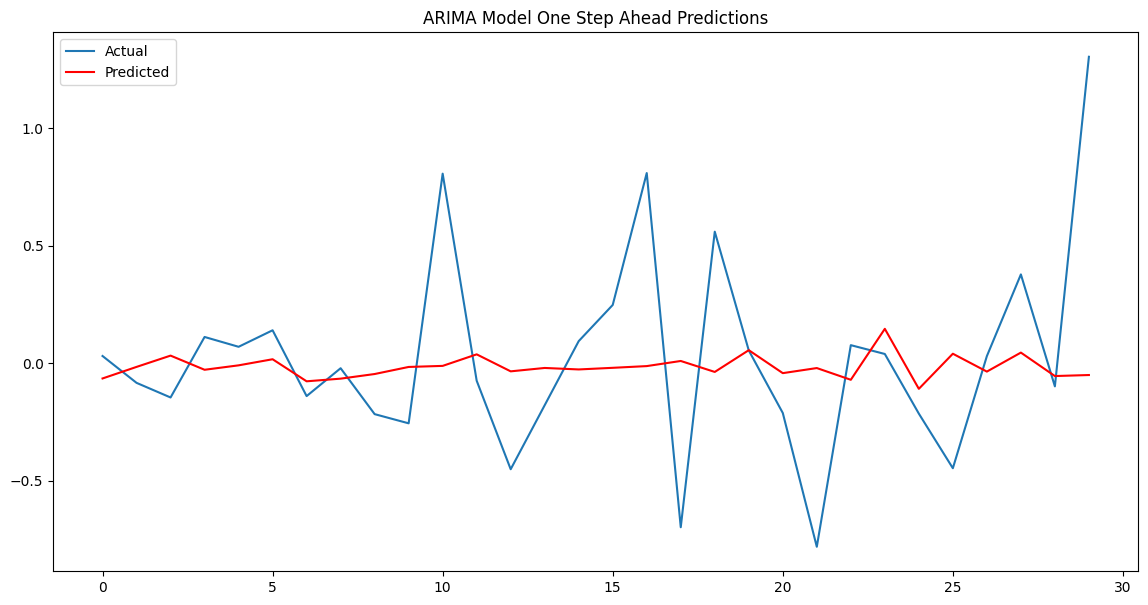

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(test_diff_scaled, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('ARIMA Model One Step Ahead Predictions')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score as accuracy, mean_squared_error

mse = mean_squared_error(test_diff_scaled, predictions)
print('Mean Squared Error (MSE): %.3f' % mse)

mse_baseline = mean_squared_error(test_diff_scaled, np.zeros_like(predictions))
print('Mean Squared Error (MSE) of 0 Baseline: %.3f' % mse_baseline)

sign_acc = accuracy(np.signbit(test_diff_scaled), np.signbit(predictions))
print('Sign Accuracy: %.3f' % sign_acc)

sign_acc_baseline = accuracy(np.signbit(test_diff_scaled), np.zeros_like(predictions))
print('Sign Accuracy: %.3f' % sign_acc_baseline)

Mean Squared Error (MSE): 0.184
Mean Squared Error (MSE) of 0 Baseline: 0.179
Sign Accuracy: 0.500
Sign Accuracy: 0.500
